In [1]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
def Model_IFA(DOC, Dc, UCS, V_Cutter_Equivalent, BR):
        UCSN = UCS/5000 # calculate the normalized UCS
        VN = V_Cutter_Equivalent/2.1 # normalize the equivalent velocity
        #New full bit IFA
        DOCn = DOC / Dc # normalize DOC
        a = 42.66 + (-70.37)/((VN)**0.54 + 0)
        b = 20.04 + (128.61)/((VN)**1.37 + 14.5)
        c = 1.0
        d = 0 + (35.1)/((UCSN**2.64) + 93.3)
        return (a + b / ((DOCn**c) + d)) - (BR)**0.87

In [3]:
DOC_list = []
DOC_list = list(range(0,20))
DOC_list = [DOC/100 for DOC in DOC_list]

IFA5K =  [Model_IFA(DOC, 0.5, 5000, 2.1, 20) for DOC in DOC_list]
IFA15K = [Model_IFA(DOC, 0.5, 15000, 2.1, 20) for DOC in DOC_list]
IFA25K = [Model_IFA(DOC, 0.5, 25000, 2.1, 20) for DOC in DOC_list]
IFA55K = [Model_IFA(DOC, 0.5, 55000, 2.1, 20) for DOC in DOC_list]

IFA_Vc1 =  [Model_IFA(DOC, 0.5, 15000, 2.1, 20) for DOC in DOC_list]
IFA_Vc2 = [Model_IFA(DOC, 0.5, 15000, 21, 20) for DOC in DOC_list]
IFA_Vc3 = [Model_IFA(DOC, 0.5, 15000, 210, 20) for DOC in DOC_list]
IFA_Vc4 = [Model_IFA(DOC, 0.5, 15000, 500, 20) for DOC in DOC_list]

# Star Plot for IFA model

In [4]:
class star_plot:
    instances = [] 
    
    def __init__(self, name, base_values):
        
        self.__class__.instances.append(self) # This line was added.
        self.name = name
        self.base_values = base_values
        self.BR_range = list(range(5,40))
        self.DOC_range = list(range(0,35))
        self.DOC_range = [i/100 for i in self.DOC_range]
        self.Dc_range = list(range(1,36))
        self.Dc_range = [i/50 for i in self.Dc_range]
        self.UCS_range = list(range(5000,60000,1600))
        self.Vc_range = list(range(1,520,15))
        #base values
        self.DOC_base = base_values[0]
        self.Dc_base = base_values[1]
        self.UCS_base = base_values[2]
        self.Vc_base = base_values[3]
        self.BR_base = base_values[4]
        self.IFA_base = base_values[5]
        
        
    def Model_IFA(self, DOC, Dc, UCS, V_Cutter_Equivalent, BR):
        UCSN = UCS/5000 # calculate the normalized UCS
        VN = V_Cutter_Equivalent/2.1 # normalize the equivalent velocity
        if self.name == 'Single cutter IFA model':
            #single cutter IFA from amin thesis
            DOCn = DOC / Dc # normalize DOC
            a = 70.66 + (-130.09)/((VN)**0.99 + 2.77)
            b = 0.49 + (19.62)/((VN)**1.15 + 40)
            c = 1.24
            d = 0.014 + 0.99/((UCSN**2.72) + 2.09)
            amin = (a+b/((DOCn**c)+d))-BR
        else:
            #New full bit IFA
            DOCn = DOC / Dc # normalize DOC
            a = 42.66 + (-70.37)/((VN)**0.54 + 0)
            b = 20.04 + (128.61)/((VN)**1.37 + 14.5)
            c = 1.0
            d = 0 + (35.1)/((UCSN**2.64) + 93.3)
            amin = (a + b / ((DOCn**c) + d)) - (BR)**0.87
        return amin
    
    @classmethod
    def Calc_Normalzied_values_AA(cls):
        for instance in cls.instances:
            instance.IFA_BR_values = [instance.Model_IFA(instance.DOC_base, instance.Dc_base, instance.UCS_base, instance.Vc_base, BR) for BR in instance.BR_range]
            instance.BR_Normalized = [BR/instance.BR_base for BR in instance.BR_range]
            instance.IFA_DOC_values = [instance.Model_IFA(DOC, instance.Dc_base, instance.UCS_base, instance.Vc_base, instance.BR_base) for DOC in instance.DOC_range]
            instance.DOC_Normalized = [DOC/instance.DOC_base for DOC in instance.DOC_range]
            instance.IFA_Dc_values = [instance.Model_IFA(instance.DOC_base, Dc, instance.UCS_base, instance.Vc_base, instance.BR_base) for Dc in instance.Dc_range]
            instance.Dc_Normalized = [Dc/instance.Dc_base for Dc in instance.Dc_range]
            instance.IFA_UCS_values = [instance.Model_IFA(instance.DOC_base, instance.Dc_base, UCS, instance.Vc_base, instance.BR_base) for UCS in instance.UCS_range]
            instance.UCS_Normalized = [UCS/instance.UCS_base for UCS in instance.UCS_range]
            instance.IFA_Vc_values = [instance.Model_IFA(instance.DOC_base, instance.Dc_base, instance.UCS_base, Vc, instance.BR_base) for Vc in instance.Vc_range]
            instance.Vc_Normalized = [Vc/instance.Vc_base for Vc in instance.Vc_range]

    @classmethod
    def Star_Plot_whole_instances(cls):
        cls.Calc_Normalzied_values_AA()
        fig = plt.figure(figsize=(20,8))
        i = 1
        for instance in cls.instances:
            plt.subplot(1, 2, i)
            plt.plot(instance.BR_Normalized, instance.IFA_BR_values, 'r--', 
                     label='BR with base = {} degree'.format(instance.BR_base))
            plt.plot(instance.DOC_Normalized, instance.IFA_DOC_values, 'b--', 
                     label='DOC with base = {} inch'.format(instance.DOC_base))
            plt.plot(instance.Dc_Normalized, instance.IFA_Dc_values, 'g--', 
                     label='Dc with base = {} inch'.format(instance.Dc_base))
            plt.plot(instance.UCS_Normalized, instance.IFA_UCS_values, 'k--', 
                     label='UCS with base = {} psi'.format(instance.UCS_base))
            plt.plot(instance.Vc_Normalized, instance.IFA_Vc_values, 'm--', 
                     label='Vc with base = {} inch/sec'.format(instance.Vc_base))
            plt.title('Star plot for {}'.format(instance.name), size = 14)
            plt.xlabel('Normalized values', fontsize=14)
            plt.ylabel('IFA', fontsize=14)
            plt.xlim(0,3)
            plt.ylim(0,90)
            plt.grid()
            plt.legend()
            plt.xticks(size = 12)
            plt.yticks(size = 12)
            i += 1

In [5]:
          #Base DOC, Dc, UCS, Vc, BR, IFA
Base_values = [0.05, 0.5, 21500, 20, 20, 1]
case1_single_cutter_IFA = star_plot('Single cutter IFA model',Base_values)
          #Base DOC, Dc, UCS, Vc, BR, IFA
#Base_values = [0.05, 0.1, 20000, 20, 20, 40]
case2_Fullbit_IFA = star_plot('Fullbit IFA model', Base_values)

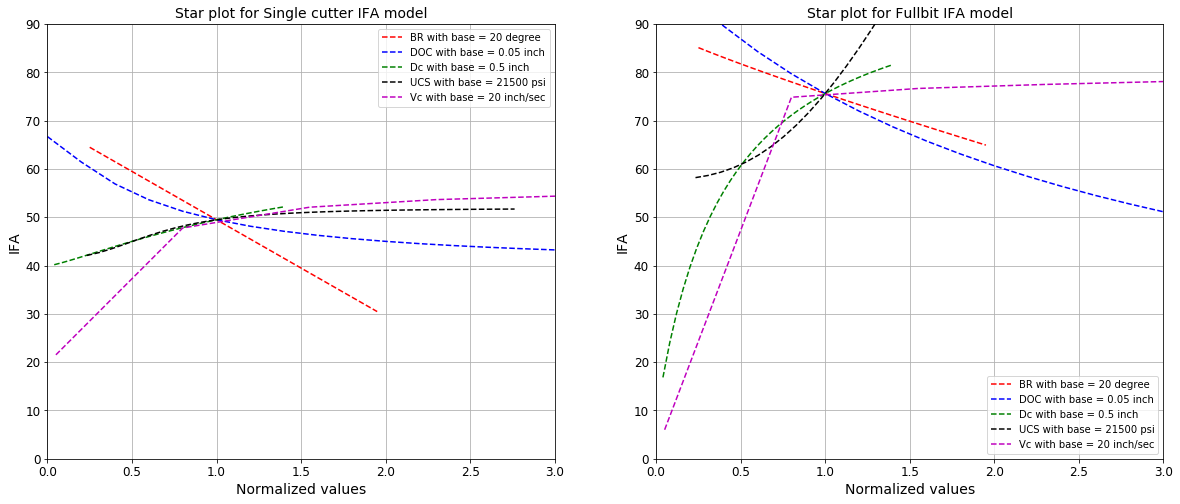

In [6]:
star_plot.Star_Plot_whole_instances()